# Multidimensional Profile



In [27]:
import pandas as pd
#Read Data
data = pd.read_csv("THE-LA_50_2019.txt", sep=';', index_col=0)

In [28]:
# See table
data.head()

,Citations,Industry Income,International Outlook,Research,Teaching
Name,,,,,
1 UC.CL,89.7,98.9,92.3,99.8,75.1
2 USP.BR,74.9,56.0,59.9,100.0,91.7
3 UNICAMP.BR,71.0,71.8,57.1,99.9,92.6
4 PUC-RIO.BR,67.5,100.0,76.7,98.6,84.1
5 ITESM.MX,75.6,99.9,87.4,96.2,77.9


## Radar function

In [29]:
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# This line allows plotly to run offline. Here in jupyter
init_notebook_mode(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  
def radarPlot(df_toPlot, ti):
    data = list()
    for index, row in df_toPlot.iterrows():
        area=go.Scatterpolar(
            # data
            r = row,
            # indicators
            theta = row.index,
            fill = 'toself',
            name = index
        )
        data.append(area)
        layout = go.Layout(            
            polar = dict(
                radialaxis = dict(
                    visible = True,
                    showticklabels=False,
                    range = [0, 100] # change this scale according your indicators scales
                    )
                ),
            showlegend = True,
            legend=dict(x=0.4, y=1.6) # Change this to move labels location
            )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

## Clustering

Creates a clustering dendogram with Complete Linkage and Ward Linkage

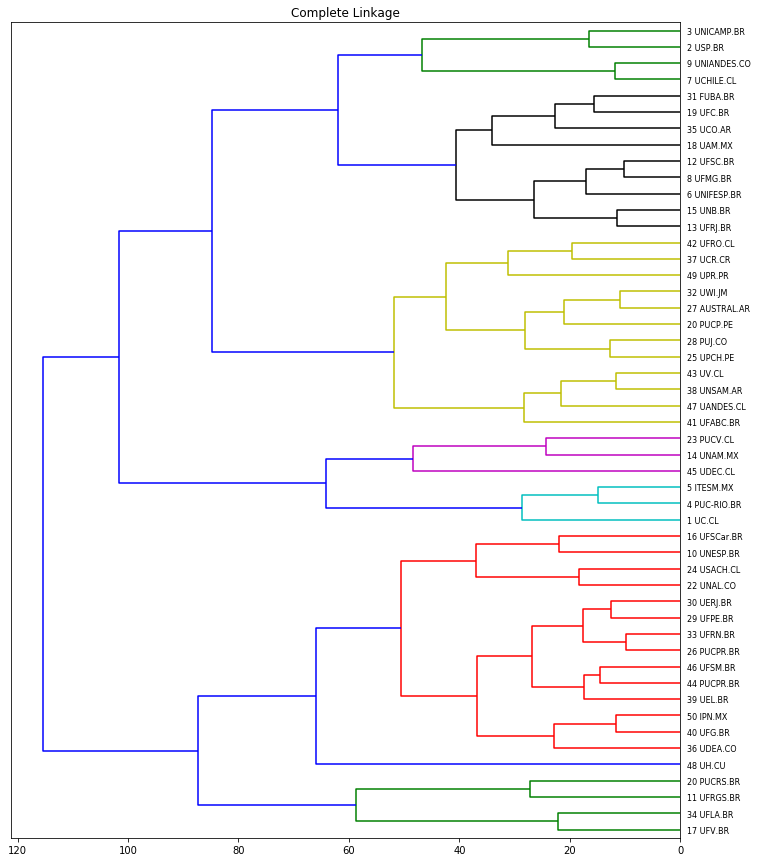

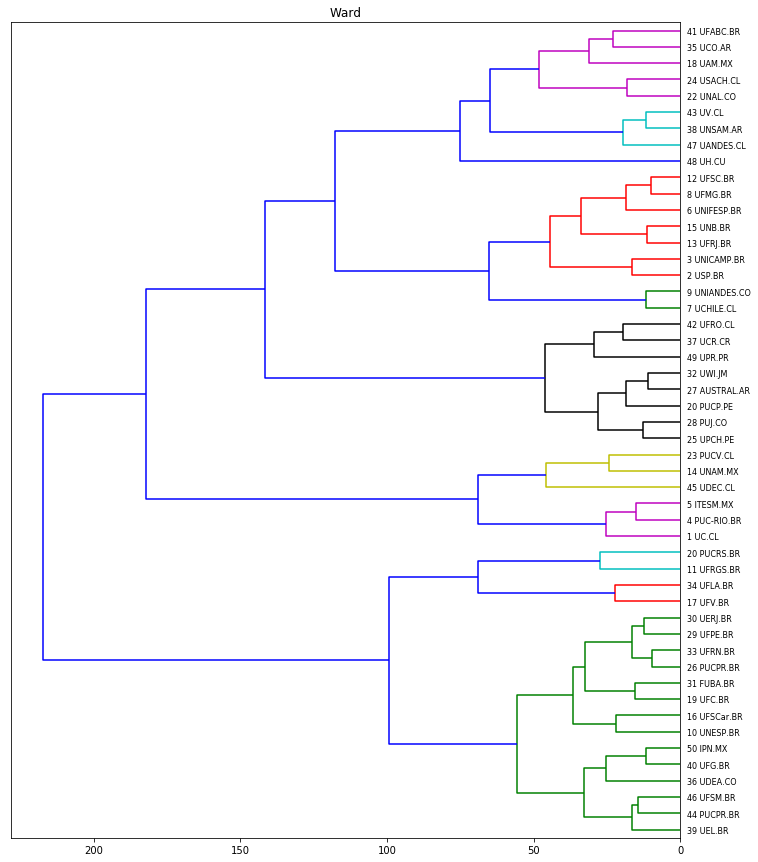

In [36]:
from scipy.cluster import hierarchy

linkage = (('Complete Linkage','complete'),  ('Ward','ward'))
dendograms = list()

for name, algorithm in linkage:    
    clustering = hierarchy.linkage(data, algorithm, optimal_ordering=0)
    
    plt.figure(figsize=(12,15))
    plt.title(name)
    
    dendograms.append(hierarchy.dendrogram(clustering, labels=data.index, orientation='left', color_threshold=60))

## Radar Plot - Profile Shape

Set *t* to select the number of clusters. Use horizontal axis from dendrogram to choose a clustering.

In [38]:

# Set t to select the number of clusters. Use horizontal axis from dendogram choose a clustering.
clusteringH=hierarchy.fclusterdata(data, t=50, method='complete', criterion='distance')

configure_plotly_browser_state()
print("No. Clusters: ", max(clusteringH))
for i in range(1, max(clusteringH)+1):
    b=list(map(lambda x: x==i, clusteringH))
    clusterDF=data.loc[b]
    radarPlot(clusterDF, 'Cluster '+str(i))

No. Clusters:  11
